Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_excel('All_Emails.xlsx')

df.drop('Unnamed: 0', axis=1, inplace = True)
df.columns = ['Label', 'Text', 'Label_Number']
df.head()

,Label,Text,Label_Number
0,spam,Why United Kingdom is best study destination_x...,1
1,non_spam,Homeowners are looking for a tenant like you z...,0
2,non_spam,Shop Assigned Mi Home VM JanakpuriHigh Street...,0
3,non_spam,Profile picture pending approval_x000D_\nHi Ru...,0
4,non_spam,Mahimagoyal JEE Main New Exam Dates Out_x000D_\n,0


In [4]:
df.shape

(980, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         980 non-null    object
 1   Text          980 non-null    object
 2   Label_Number  980 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.1+ KB


In [6]:
df.isna().sum()

Label           0
Text            0
Label_Number    0
dtype: int64

In [7]:
df['Label_Number'].value_counts()

0    938
1     42
Name: Label_Number, dtype: int64

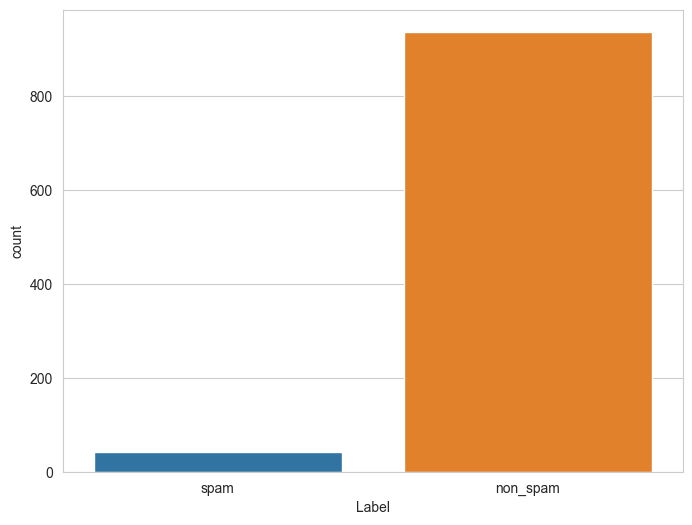

In [8]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'Label');

Count no. of each word

In [9]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)
df['count']=df['Text'].apply(count_words)
df['count']

0      713
1      114
2      687
3      107
4        7
      ... 
975     27
976     28
977    277
978     15
979      3
Name: count, Length: 980, dtype: int64

In [10]:
df.groupby('Label_Number')['count'].mean()

Label_Number
0    199.382729
1    423.642857
Name: count, dtype: float64

Tokenization

In [11]:
%%time
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

print('Before cleaning:')
df.head()

Before cleaning:
CPU times: total: 0 ns
Wall time: 999 µs


,Label,Text,Label_Number,count
0,spam,Why United Kingdom is best study destination_x...,1,713
1,non_spam,Homeowners are looking for a tenant like you z...,0,114
2,non_spam,Shop Assigned Mi Home VM JanakpuriHigh Street...,0,687
3,non_spam,Profile picture pending approval_x000D_\nHi Ru...,0,107
4,non_spam,Mahimagoyal JEE Main New Exam Dates Out_x000D_\n,0,7


In [12]:
print('After cleaning:')
df['Text'] = df['Text'].apply(lambda string: clean_str(string))
df.head()

After cleaning:


,Label,Text,Label_Number,count
0,spam,why united kingdom is best study destination x...,1,713
1,non_spam,homeowners are looking for a tenant like you z...,0,114
2,non_spam,shop assigned mi home vm janakpurihigh street ...,0,687
3,non_spam,profile picture pending approval x d hi rupal ...,0,107
4,non_spam,mahimagoyal jee main new exam dates out x d,0,7


Stemming words

In [13]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])
df['Text']=df['Text'].apply(stemming)
df.head()

,Label,Text,Label_Number,count
0,spam,why united kingdom is best study destination x...,1,713
1,non_spam,homeowners are looking for a tenant like you z...,0,114
2,non_spam,shop assigned mi home vm janakpurihigh street ...,0,687
3,non_spam,profile picture pending approval x d hi rupal ...,0,107
4,non_spam,mahimagoyal jee main new exam dates out x d,0,7


In [14]:
X = df.loc[:, 'Text']
y = df.loc[:, 'Label_Number']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (980,)
shape of y: (980,)


Split into Training data and Test data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [16]:
print(f"Training Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")


Training Data Shape: (784,)
Test Data Shape: (196,)


Count Vectorization to Extract Features from Text

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv.fit(X_train)

CountVectorizer()

In [18]:
print('No.of Tokens: ',len(cv.vocabulary_.keys()))

No.of Tokens:  9246


In [19]:
dtv = cv.transform(X_train)
type(dtv)

scipy.sparse._csr.csr_matrix

In [20]:
dtv = dtv.toarray()

In [21]:
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 784
Tokens/Features: 9246


In [22]:
dtv[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Apply different models

In [23]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(dtv, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 0.87 sec
MultinomialNB        trained in 0.07 sec
Logistic Regr.       trained in 0.11 sec
KNN                  trained in 0.0 sec
Decision Tree        trained in 0.83 sec
SVM (Linear)         trained in 0.09 sec
SVM (RBF)            trained in 0.9 sec
CPU times: total: 2.19 s
Wall time: 2.96 s


In [24]:
test_dtv = cv.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens: {test_dtv.shape[1]}")

Number of Observations: 196
Tokens: 9246


Test Accuracy and Training Time

In [25]:
models_accuracy = []
for name, model in models.items():
    models_accuracy.append([name, model["model"].score(test_dtv, y_test),model["perf"]])

In [26]:
df_accuracy = pd.DataFrame(models_accuracy)
df_accuracy.columns = ['Model', 'Test Accuracy', 'Training time (sec)']
df_accuracy.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
df_accuracy.reset_index(drop = True, inplace=True)
df_accuracy

,Model,Test Accuracy,Training time (sec)
0,SVM (RBF),0.974490,0.90
1,Logistic Regr.,0.969388,0.11
2,Decision Tree,0.969388,0.83
3,KNN,0.964286,0.00
4,SVM (Linear),0.964286,0.09
5,Random Forest,0.959184,0.87
6,MultinomialNB,0.959184,0.07


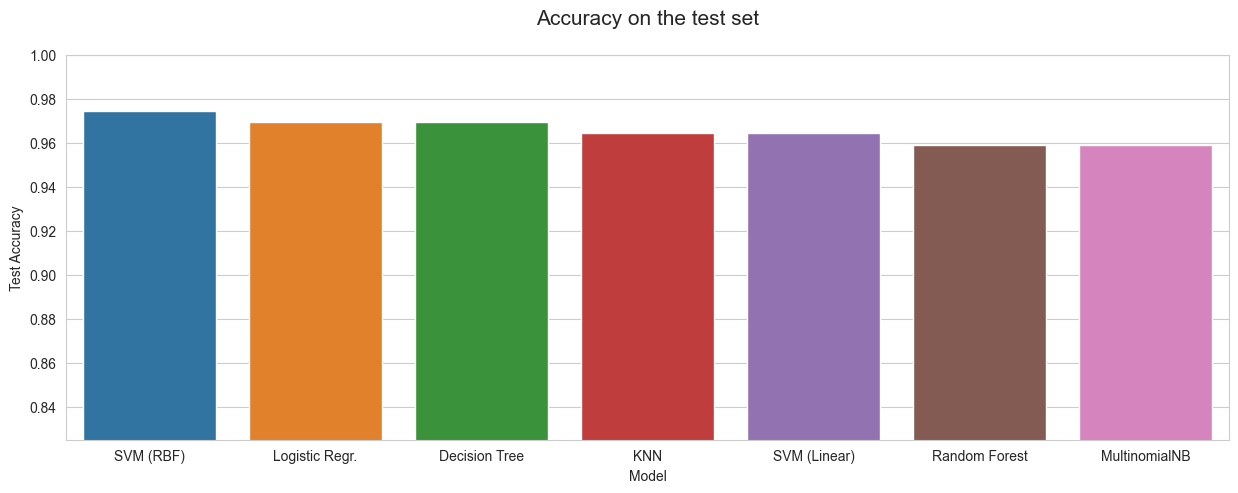

In [27]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Test Accuracy', data = df_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.825,1)
plt.show()

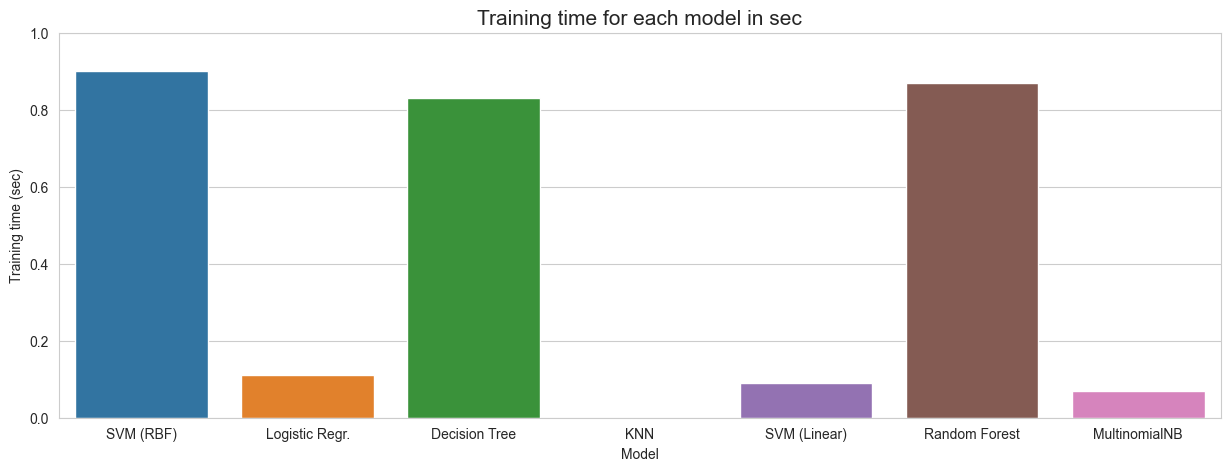

In [28]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_accuracy)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,1)
plt.show()

Logistic Regression

In [29]:
%%time
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(dtv, y_train)
pred = lr.predict(test_dtv)

CPU times: total: 78.1 ms
Wall time: 84.5 ms


In [30]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.93877551020408


Classification Report

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.75      0.75      0.75        12

    accuracy                           0.97       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.97      0.97      0.97       196



Confusion Matrix

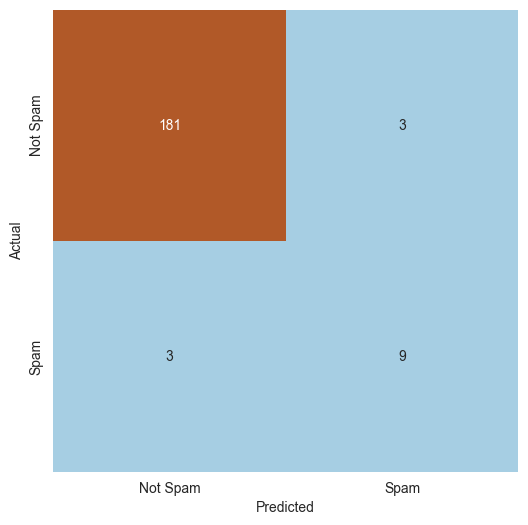

In [33]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

Support Vector Machine (RBF)

In [34]:
%%time
svc = SVC()
svc.fit(dtv, y_train)
pred = svc.predict(test_dtv)

CPU times: total: 906 ms
Wall time: 1.18 s


In [35]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  97.44897959183673


Classification Report

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       184
           1       1.00      0.58      0.74        12

    accuracy                           0.97       196
   macro avg       0.99      0.79      0.86       196
weighted avg       0.98      0.97      0.97       196



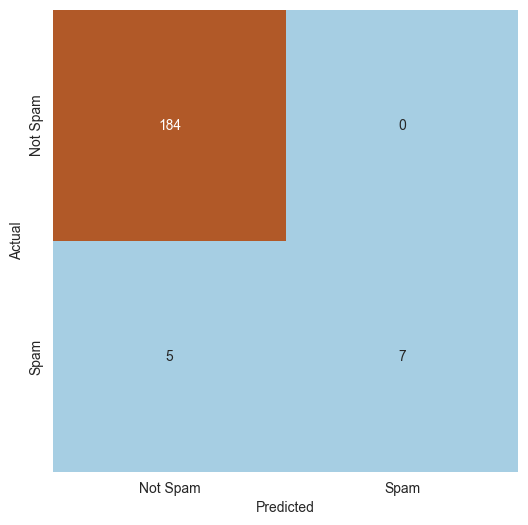

In [37]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);


Random Forest Classifier

In [38]:
%%time
rfc = RandomForestClassifier()
rfc.fit(dtv, y_train)
pred = rfc.predict(test_dtv)

CPU times: total: 641 ms
Wall time: 865 ms


In [39]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


Classification Report

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.69      0.75      0.72        12

    accuracy                           0.96       196
   macro avg       0.84      0.86      0.85       196
weighted avg       0.97      0.96      0.96       196



Confusion Matrix

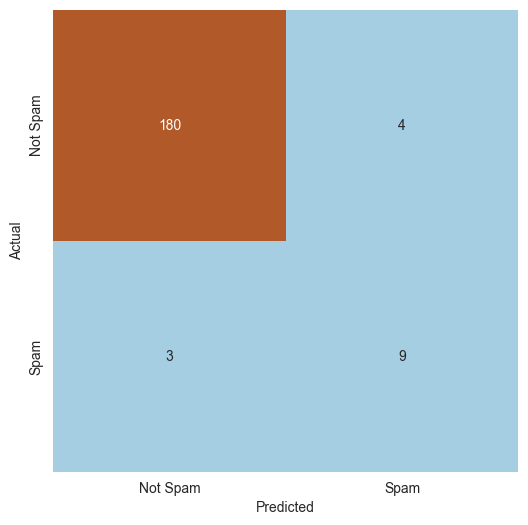

In [41]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

In [42]:
%%time
mnb = MultinomialNB()
mnb.fit(dtv, y_train)
pred = mnb.predict(test_dtv)

CPU times: total: 46.9 ms
Wall time: 59.6 ms


In [43]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  95.91836734693877


In [44]:

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.67      0.67      0.67        12

    accuracy                           0.96       196
   macro avg       0.82      0.82      0.82       196
weighted avg       0.96      0.96      0.96       196



Confusion Matrix


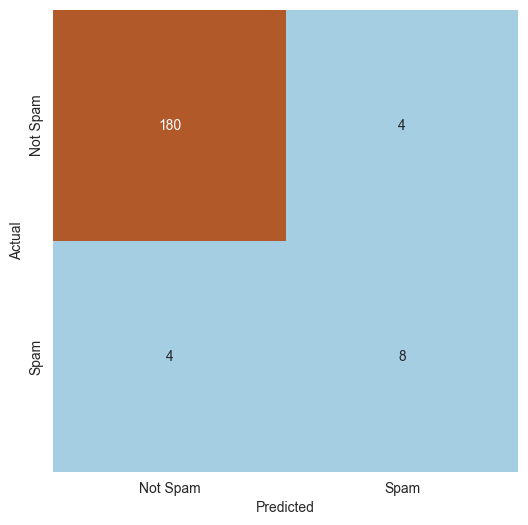

In [45]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);


Support Vector Machine (Linear)

In [46]:
%%time
lsvc = LinearSVC()
lsvc.fit(dtv, y_train)
pred = lsvc.predict(test_dtv)

CPU times: total: 93.8 ms
Wall time: 93.6 ms


In [47]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.69      0.75      0.72        12

    accuracy                           0.96       196
   macro avg       0.84      0.86      0.85       196
weighted avg       0.97      0.96      0.96       196



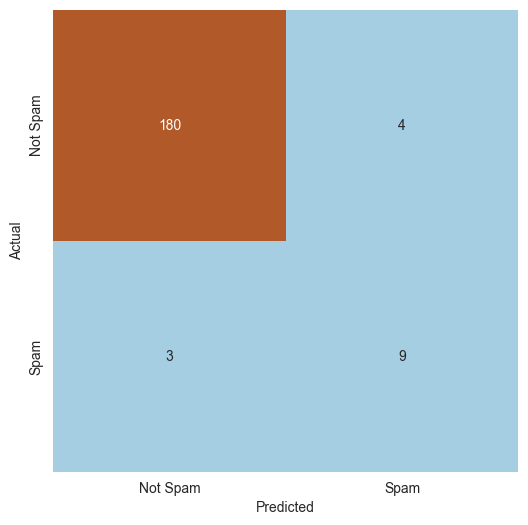

In [49]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);


Decision Tree Classifier

In [50]:
%%time
dtc = DecisionTreeClassifier()
dtc.fit(dtv, y_train)
pred = dtc.predict(test_dtv)

CPU times: total: 500 ms
Wall time: 970 ms


In [51]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.93877551020408


In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.75      0.75      0.75        12

    accuracy                           0.97       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.97      0.97      0.97       196



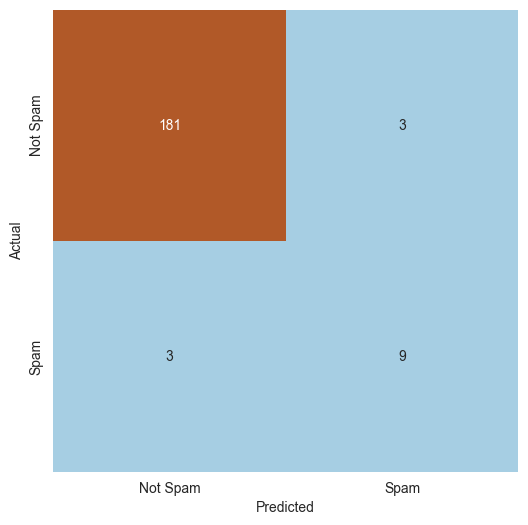

In [53]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);


K Nearest Neighbours

In [54]:
%%time
knn = KNeighborsClassifier()
knn.fit(dtv, y_train)
pred = knn.predict(test_dtv)

CPU times: total: 156 ms
Wall time: 77.9 ms


In [55]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.73      0.67      0.70        12

    accuracy                           0.96       196
   macro avg       0.85      0.83      0.84       196
weighted avg       0.96      0.96      0.96       196



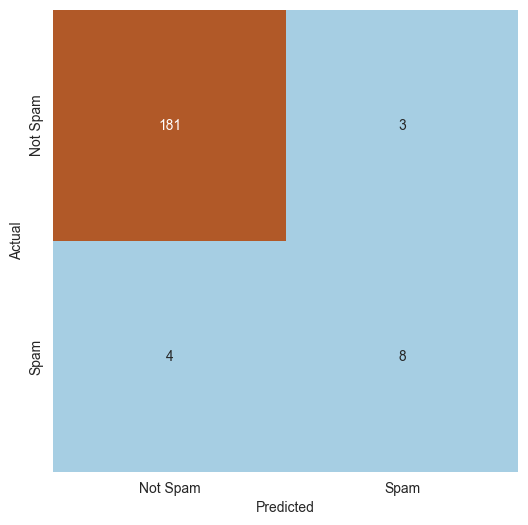

In [57]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);
